# 1.  Plot spektrum dari suatu file tabel

Kita akan memplot spektrum dari sebuah file csv (comma separated value) di PC. Sebagai contoh, kita akan menggunakan file bernama *namafile.csv*. 

Berikut isi dari file tersebut:  
3515.605713,1.94E-16 <br>
3517.463029,1.83E-16 <br>
3519.320346,1.07E-16 <br>
3521.177662,1.51E-16 <br>
3523.034979,2.29E-16 <br>
3524.892295,2.76E-17 <br>
.... <br>
9938.206055,-4.26E-16 <br>

Data di dalam file tersebut berupa tabel yang dipisahkan oleh tanda koma (,).

Pertama, kita akan menggunakan 2 package di python, yakni *astropy.units* dan *numpy*. 

In [2]:
import astropy.units as u
import numpy as np

Kolom pertama pada data tabel menunjukkan panjang gelombang (dalam satuan Angstrom) dan kolom kedua menunjukkan fluks (dalam satuan erg cm$^{-2}$ s$^{-1}$). Satuan ini tidak tertulis secara eksplisit di file tersebut, padahal kita membutuhkannya untuk melakukan analisis data.

Satuan angstrom sudah ada dalam database astropy.units. Namun sayangnya, satuan fluks erg cm$^{-2}$ s$^{-1}$ belum ada sehingga kita harus mendefinisikan satuan tersebut.

In [3]:
fluxunit = u.erg / (u.cm ** 2 * u.s)

Buka file *namafile.csv* dengan perintah *np.loadtxt* lalu pisahkan data kolom pertama dalam suatu array data baru bernama *wave* dan kolom data kedua sebagai array bernama *flux*.

In [12]:
file = np.loadtxt("namafile.csv", delimiter = ",").T  
wave = file[0] * u.AA
flux = file[1] * fluxunit

Definisikan data spektrum sebagai spektrum 1 dimensi menggunakan package *specutils*. 

In [13]:
from specutils import Spectrum1D
spec = Spectrum1D(spectral_axis=wave, flux=flux)

Plot spektrum di atas dengan menggunakan package *matplotlib*. Ini adalah spektrum planetary nebula yang memiliki garis kontinu lemah dan didominasi garis emisi.

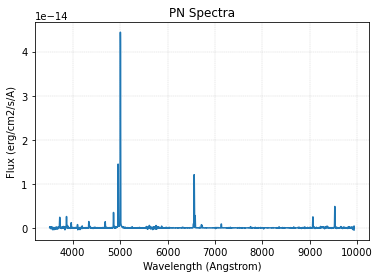

In [14]:
import matplotlib.pyplot as plt

#plot spectrum
fig, ax = plt.subplots() 
ax.plot(spec.spectral_axis, spec.flux)  
ax.set_xlabel("Wavelength (Angstrom)")  
ax.set_ylabel("Flux (erg/cm2/s/A)") 
ax.grid(color='grey', alpha=0.8, linestyle='-.', linewidth=0.2, axis='both') 
ax.set_title("PN Spectra", loc='center', fontsize=12, fontweight=0.5)

#Show Plot
plt.show()